> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate TMDb Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

### Dataset
I choose the TMDb movie data set for data analysis. 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.I would like to find other intresting patterns in the dataset.
### Contain:

   - Total Rows = 10866
   - Total Columns = 21
   - After Seeing the dataset we can say that some columns is contain null values



### Questions
1. What is The Highest and Lowest Movie Ever in Terms of Profit ?
2. What is All Times Top 10 Movies Which Earn The Highest Profit?
3. Which Length Most Liked by The Audiences According to their Popularity?
4. What is The Top 20 Genres With Higher Number Of Release?
5. What are The Top Profitable Production Companies?
6. What Kinds of Properties are Associated with Movies that have High Revenue?
7. How Does The Revenue And Popularity affects Budget ?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


# <a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.
you should include a description of the columns
### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
movie = pd.read_csv("movies.csv")
movie.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
movie.shape

(10866, 21)

It has 10866 Value  
21 Columns

In [4]:
#Get a summary about the dataset
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
#Get a statistic summary about the dataset
movie.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Looks like! The budget and revenue columns have lot of zero value which can affect the analysis, so I will remove them 

In [6]:
#count total rows in each column which contain null values
movie.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

since null value only exist in non int columns, it won't affect the analysis

I will drop these columns since I don't need them in my analysis
1. Budget_adj
2. Revenue_adj
3. Tagline
4. Homepage
5. Imdb_id
6. Overview


In [7]:
#Get the number of duplicated rows
movie.duplicated().sum()

1

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning

    1. Remove duplicate rows from the dataset
    2. Changing format of release date into datetime format
    3. Remove the movies which are having zero value of budget or revenue.
    4. Remove the unused colums that are not needes in the analysis process.

https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/

1. Remove Duplicate Rows

In [8]:
#will remove duplicated which is one row
movie.drop_duplicates(inplace=True)

2. Changing Format Of Release Date Into Datetime Format

In [9]:
movie['release_date'] = pd.to_datetime(movie['release_date'])

In [10]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj       

3. Remove the movies which are having zero value of budget or revenue.

After seeing that the number of zeros in Budget and Revenue 

I will Drop Budget with Zero values because that mean a missing data 

In [11]:
movie.query('budget == 0 or revenue == 0').count()

id                      7011
imdb_id                 7001
popularity              7011
budget                  7011
revenue                 7011
original_title          7011
cast                    6939
homepage                1510
director                6968
tagline                 4467
keywords                5656
overview                7007
runtime                 7011
genres                  6988
production_companies    6027
release_date            7011
vote_count              7011
vote_average            7011
release_year            7011
budget_adj              7011
revenue_adj             7011
dtype: int64

In [12]:
clear = movie.query('budget == "0"').index
movie.drop(movie.index[clear], axis=0, inplace=True)

4. Remove the unused colums that are not needed in the analysis process
    
    The columns like imdb_id, homepage,tagline, overview, budget_adj and revenue_adj are not required for my analysis and I will drop these columns.

In [13]:
#Remove unwanted columns
movie.drop(['budget_adj', 'revenue_adj', 'tagline', 'homepage', 'imdb_id', 'overview'], axis=1, inplace=True)

In [14]:
movie.tail()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
10833,3001,0.737730,0,0,How to Steal a Million,Audrey Hepburn|Peter O'Toole|Eli Wallach|Hugh ...,William Wyler,insurance fraud|theft|art thief|swinging 60s|f...,123,Comedy|Crime|Romance,World Wide Productions,2066-07-13,67,7.3,1966
10836,38720,0.239435,0,0,Walk Don't Run,Cary Grant|Samantha Eggar|Jim Hutton|John Stan...,Charles Walters,hotel room|embassy|olympics|housing shortage,114,Comedy|Romance,Columbia Pictures Corporation,2066-01-01,11,5.8,1966
10842,36540,0.253437,0,0,Winnie the Pooh and the Honey Tree,Sterling Holloway|Junius Matthews|Sebastian Ca...,Wolfgang Reitherman,NaN,25,Animation|Family,NaN,2066-01-01,12,7.9,1966
10849,28270,0.206537,0,0,Gambit,Michael Caine|Shirley MacLaine|Herbert Lom|Joh...,Ronald Neame,master thief,109,Action|Comedy|Crime,Universal Pictures,2066-12-16,14,6.1,1966
10856,20277,0.140934,0,0,The Ugly Dachshund,Dean Jones|Suzanne Pleshette|Charles Ruggles|K...,Norman Tokar,great dane|dachshund,93,Comedy|Drama|Family,Walt Disney Pictures,2066-02-16,14,5.7,1966


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

## What is The Highest and Lowest Movie Ever in Terms of Profit ? 

In [15]:
#Caluculate the profit in a new column
movie['profit'] = movie['revenue'] - movie['budget']

https://stackoverflow.com/questions/15741759/find-maximum-value-of-a-column-and-return-the-corresponding-row-values-using-pan

In [16]:
#function to make ultimate comparison between the highest and lowest through all the years
def ulti_comparison(x):
    #to write the comparison varibles in a better way
    y = x.replace('_', ' ').title()
    #Get the maximum and minimum value in movies profit
    max_value = movie.loc[movie[x].idxmax()]
    mini_value = movie.loc[movie[x].idxmin()]
    #Write the summary of the comparison
    print("The highest {} movie is : {} with {} = {}".format(y, max_value['original_title'], y, max_value[x]))
    print("The lowest {} movie is : {} with {} = {}".format(y, mini_value['original_title'], y, mini_value[x]))
    return pd.concat([max_value,mini_value], axis=1, keys=[max_value['original_title'], mini_value['original_title']])

In [17]:
ulti_comparison('profit')

The highest Profit movie is : Avatar with Profit = 2544505847
The lowest Profit movie is : The Lone Ranger with Profit = -165710090


,Avatar,The Lone Ranger
id,19995,57201
popularity,9.43277,1.21451
budget,237000000,255000000
revenue,2781505847,89289910
original_title,Avatar,The Lone Ranger
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Johnny Depp|Armie Hammer|William Fichtner|Hele...
director,James Cameron,Gore Verbinski
keywords,culture clash|future|space war|space colony|so...,texas|horse|survivor|texas ranger|partner
runtime,162,149
genres,Action|Adventure|Fantasy|Science Fiction,Action|Adventure|Western




The first column shows the highest profit made by a movie and second column shows the highest in loss movie in this dataset.

As we can see that 'Avatar' movie Directed by James Cameron earn the highest profit in all, making over 2.5B in profit in this dataset.

And the most in loss movie in this dataset is The Warrior's Way. Going in loss by more than 400M was directed by Singmoo Lee.



## What is All Times Top 10 Movies Which Earn The Highest Profit?

https://stackoverflow.com/questions/43859416/finding-top-10-in-a-dataframe-in-pandas

In [18]:
#Get the top10 profitable movies by using nlargest()
top10 = movie.nlargest(10, 'profit')[['original_title','profit']]
#make a dataframe and make the index movies titles 
top10 = pd.DataFrame(data = (top10['profit'].values), index = top10['original_title'])
top10.rename(columns={0:'profit'}, inplace=True)

https://www.geeksforgeeks.org/python-seaborn-pointplot-method/

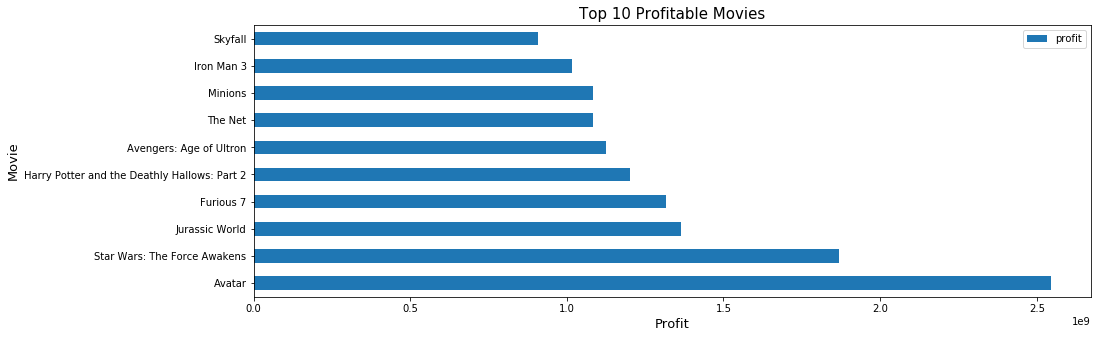

In [19]:
ax=top10.plot(kind='barh', figsize=(15,5));
#setup the title and labels of the plot.
ax.set_title("Top 10 Profitable Movies",fontsize = 15)
ax.set_xlabel("Profit",fontsize = 13)
ax.set_ylabel("Movie",fontsize = 13);

I chose Bar Graph to compare differences in Profit among The Movies.

It shows that Avatar is the Most Profitable movie through the years with over 2.5 Billion Dollars

## What is The Top 20 Genres With Higher Number Of Release?

In [20]:
#to count the items in rows that have multiple items
def count_items(x):
    data = movie[x].str.cat(sep = '|')
    data = pd.Series(data.split('|'))
    data = data.value_counts()
    return data

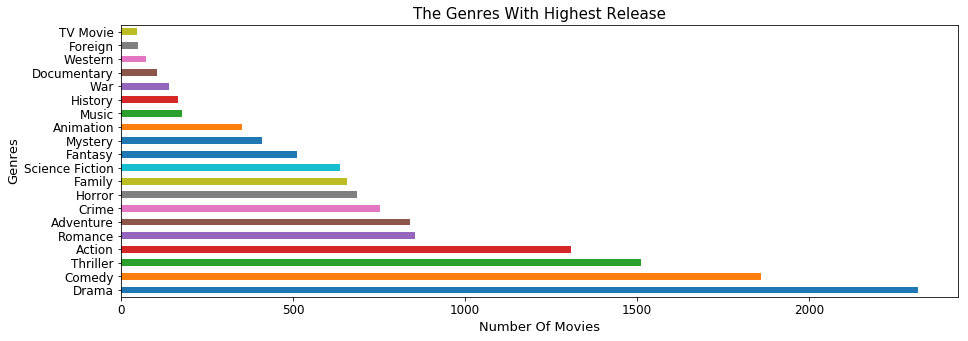

In [21]:
count_items('genres').iloc[:20].plot(kind='barh',figsize = (15,5),fontsize=12)
#setup the title and labels.
plt.title("The Genres With Highest Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13);

I chose Bar Graph to compare differences in Number of Release among The Genres

it shows that Drama Genre has the highest Realese through the years with over 2000 movie

## What are The Top Profitable Production Companies?

In [22]:
companies = pd.DataFrame(count_items('production_companies'))
data = pd.DataFrame(movie.groupby('production_companies')['profit'].sum()).sort_values(by='profit', ascending=False)

for i in list(data.index):
    profit = data.loc[i]
    split_companies = list(i.split('|'))
    companies.loc[split_companies] = companies.loc[split_companies] + profit[0]
companies = companies.sort_values(by=0, ascending=False)

In [23]:
companies.rename(columns={0:'profit'}).head(10)

,profit
Warner Bros.,30118470716
Universal Pictures,27953086980
Paramount Pictures,21930057380
Twentieth Century Fox Film Corporation,21663739024
Walt Disney Pictures,19872264295
Columbia Pictures,17906525744
Amblin Entertainment,11207946396
New Line Cinema,10605042415
DreamWorks SKG,9101900530
Legendary Pictures,8086015686


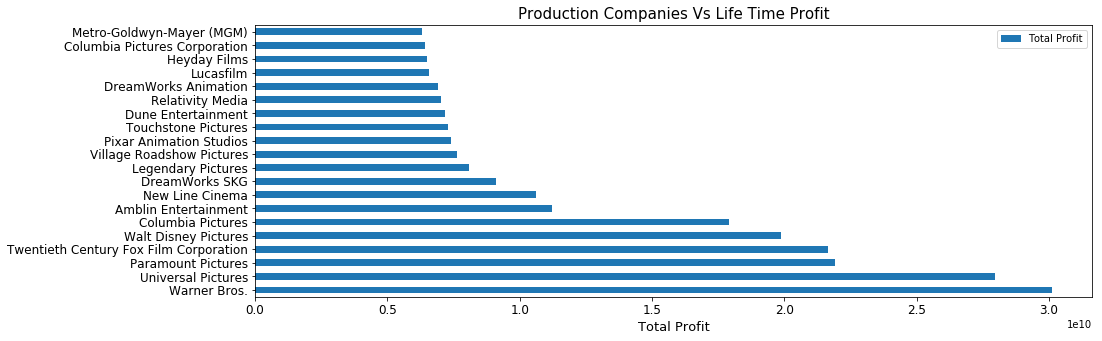

In [24]:
#Rename the column name 
companies = companies.rename(columns={0:'Total Profit'})
#Get the top 20
#plot the barh plot
companies[:20].plot.barh(figsize=(15,5),fontsize=12,legend=True)
plt.title("Production Companies Vs Life Time Profit",fontsize=15)
plt.xlabel('Total Profit',fontsize=13);

I chose Bar Graph to compare differences in Profit among The Production Companies 

It Shows that Warner Bros with over 30 Billion Dollar

## Which Length Most Liked by The Audiences According to their Popularity?

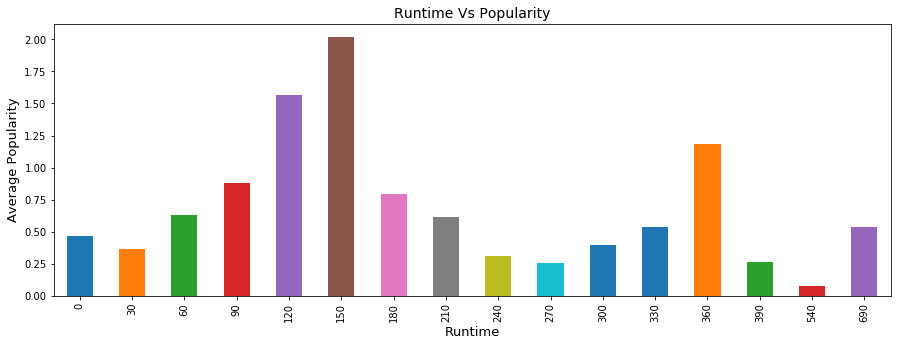

In [25]:
#Convert Runtime to Catogrical data
movie['runtime30'] = movie['runtime'].apply(lambda x : (x//30)*30)
movie.groupby('runtime30')['popularity'].mean().plot(kind='bar',figsize = (15,5));
                                            
#setup the title of the figure
plt.title("Runtime Vs Popularity",fontsize = 14)

#setup the x-label and y-label of the plot.
plt.xlabel('Runtime',fontsize = 13)
plt.ylabel('Average Popularity',fontsize = 13);

I used Bar Gragh to Show which lenght People like more

Looks that 2 hours 30 min has The Highest Popularity

## What Kinds of Properties are Associated with Movies that have High Revenue?

In [26]:
#Get the attributes by sorting descending
# make a mask by query() to remove budget and revenue that have bad values
movie_attributes = movie[['original_title', 'popularity', 'budget', 'revenue', 'runtime', 'genres', 'vote_count', 'vote_average', 'profit', 'production_companies']].query('revenue > 1000 and budget > 1000').sort_values(by='revenue', ascending=False)
movie_attributes.head(10)

,original_title,popularity,budget,revenue,runtime,genres,vote_count,vote_average,profit,production_companies
1386,Avatar,9.432768,237000000,2781505847,162,Action|Adventure|Fantasy|Science Fiction,8458,7.1,2544505847,Ingenious Film Partners|Twentieth Century Fox ...
3,Star Wars: The Force Awakens,11.173104,200000000,2068178225,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,1868178225,Lucasfilm|Truenorth Productions|Bad Robot
0,Jurassic World,32.985763,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,1363528810,Universal Studios|Amblin Entertainment|Legenda...
4,Furious 7,9.335014,190000000,1506249360,137,Action|Crime|Thriller,2947,7.3,1316249360,Universal Pictures|Original Film|Media Rights ...
14,Avengers: Age of Ultron,5.944927,280000000,1405035767,141,Action|Adventure|Science Fiction,4304,7.4,1125035767,Marvel Studios|Prime Focus|Revolution Sun Studios
3374,Harry Potter and the Deathly Hallows: Part 2,5.711315,125000000,1327817822,130,Adventure|Family|Fantasy,3750,7.7,1202817822,Warner Bros.|Heyday Films|Moving Picture Compa...
5425,Iron Man 3,4.946136,200000000,1215439994,130,Action|Adventure|Science Fiction,6882,6.9,1015439994,Marvel Studios
8,Minions,7.404165,74000000,1156730962,91,Family|Animation|Adventure|Comedy,2893,6.5,1082730962,Universal Pictures|Illumination Entertainment
4365,Skyfall,5.603587,200000000,1108561013,143,Action|Adventure|Thriller,6137,6.8,908561013,Columbia Pictures
8094,The Net,1.136610,22000000,1106279658,114,Crime|Drama|Mystery|Thriller|Action,201,5.6,1084279658,Columbia Pictures


In [27]:
movie_attributes.head(50).describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
count,50.000000,5.000000e+01,5.000000e+01,50.000000,50.000000,50.000000,5.000000e+01
mean,5.748100,1.663500e+08,1.020095e+09,131.040000,3708.120000,6.928000,8.537453e+08
std,4.886586,7.777901e+07,3.486615e+08,23.434633,1927.203691,0.664567,3.385840e+08
min,0.813323,1.050000e+07,7.582399e+08,88.000000,201.000000,5.600000,5.696536e+08
25%,3.181535,1.162500e+08,8.390788e+08,115.000000,2757.000000,6.400000,6.830212e+08
50%,4.859375,1.725000e+08,9.291384e+08,136.000000,3200.500000,7.000000,7.702324e+08
75%,6.295174,2.000000e+08,1.053746e+09,148.750000,4268.000000,7.400000,8.616539e+08
max,32.985763,3.800000e+08,2.781506e+09,169.000000,9767.000000,8.100000,2.544506e+09


I see here that Top high Revenue Movies have High Profit, Budget and Popularity and Most of their Rating near The Mean = 7 according to Low Standard Deviation 

## How Does The Revenue And Popularity affects Budget ?

https://www.geeksforgeeks.org/python-pandas-dataframe-corr/

Correlation Between Revenue And Budget :  0.735415010119


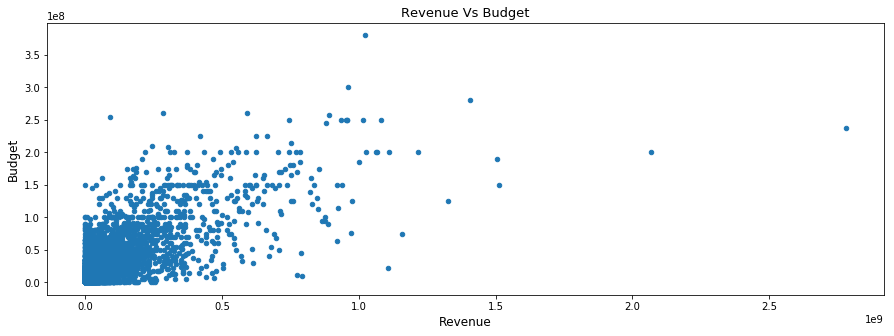

In [28]:
ax = movie.plot(x='revenue', y='budget', kind='scatter', figsize=(15,5))
#set the title and labels of the figure
ax.set_title("Revenue Vs Budget",fontsize=13)
ax.set_xlabel("Revenue",fontsize=12)
ax.set_ylabel("Budget",fontsize=12);
#to get the correlation value
data_corr = movie.corr()
print("Correlation Between Revenue And Budget : ",data_corr.loc['revenue','budget'])

Correlation Between Popularity And Profit :  0.523060008157


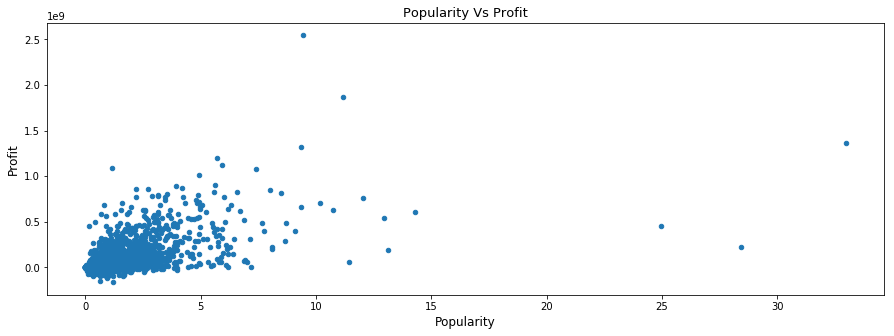

In [29]:
ax = movie.plot(x='popularity', y='profit', kind='scatter', figsize=(15,5))
#set the title and labels of the figure
ax.set_title("Popularity Vs Profit",fontsize=13)
ax.set_xlabel("Popularity",fontsize=12)
ax.set_ylabel("Profit",fontsize=12);
data_corr = movie.corr()
print("Correlation Between Popularity And Profit : ",data_corr.loc['popularity','budget'])

I chose Scatter here to show the relationship between Revenue vs Budget and Popularity vs Profit 

1. Budget vs Revenue : Budget and revenue both have positive correlation(0.73) between them. 
   - Means there is a good possibility that movies with higher investments result in better revenues.


2. Popularity Vs Profit : Popularity and profit have positive correlation(0.55). 
   - It means that movie with high popularity tends to earn high profit.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.




 - Drama is the most popular genre.
 - Drame, Comedy, Thriller and Action are four most-made genres.
 - 'Avatar', 'Star Wars' and 'Titanic' are the most profitable movies.
 - The Runtime 2 hours 30 min is more popular than long duration movies.
 - Warner Bros, Universal Pictures and Paramount Pictures production companies earn more life time profit than other production companies.
 - Means there is a good possibility that movies with higher investments result in better revenues.
 - Means that movie with high popularity tends to earn high profit.

### Limitations

- It's not 100 percent guaranteed solution that this formula is gonna work, But it shows us that we have high probability of making high profits if we had similar characteristics as such. 
    If we release a movie with these characteristics, it gives people high expectations for this movie. This was just one example of an influantial factor that would lead to different results, there are many that have to be taken care of.
- This Dataset only has data from 1966 to 2015 which Means that maybe alot of things changed after those years

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0